## Preprocessing for Assignment III

    age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
0  36.0    1        1           2        1        1         1          1   
1  45.0    1        1           1        1        1         1          1   
2  47.0    1        0           1        1        1         1          1   
3  36.0    1        0           2        1        1         1          1   
4  50.0    1        1           2        1        1         1          1   

   liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  \
0           1                1        1        1        1          3   
1           1                1        1        1        1         10   
2           1                1        1        1        1         34   
3           1                0        1        1        1          5   
4           1                1        1        1        1          7   

   alk_phosphate  sgot  albumin  protime  histology  target  
0             10    44       16       44        

/var/folders/y0/5p1rc9fs535fy8254hdj1qn80000gp/T/ipykernel_32154/3121525240.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette="viridis")
/var/folders/y0/5p1rc9fs535fy8254hdj1qn80000gp/T/ipykernel_32154/3121525240.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="viridis")
/var/folders/y0/5p1rc9fs535fy8254hdj1qn80000gp/T/ipykernel_32154/3121525240.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="viridis")
/var/folders/y0/5p1rc9fs535fy82

<Figure size 1200x800 with 0 Axes>

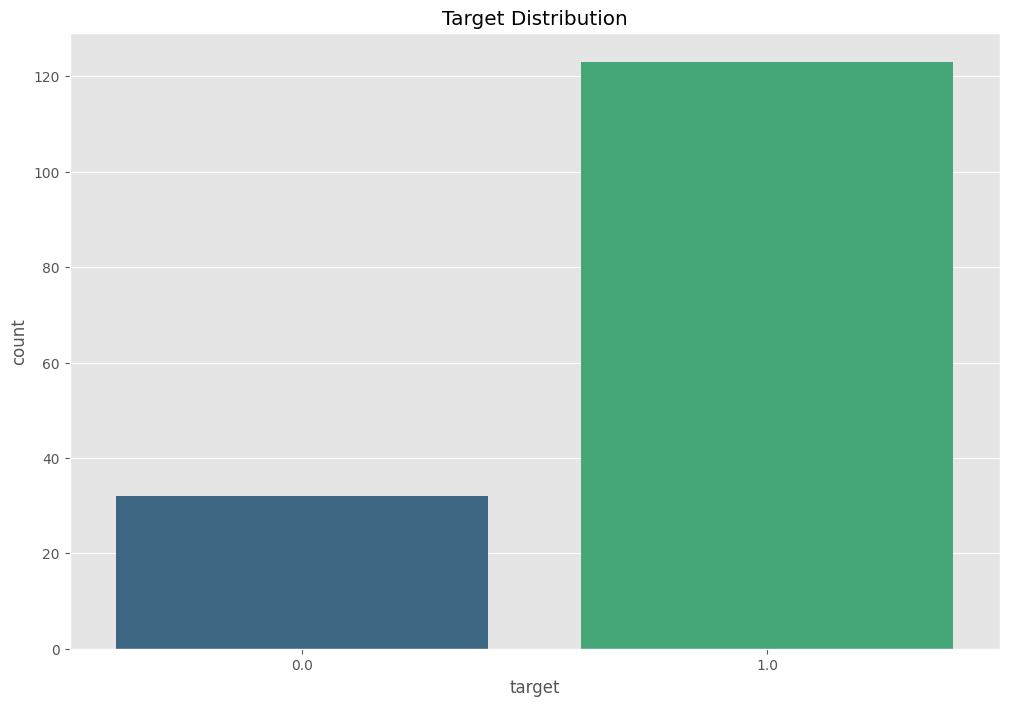

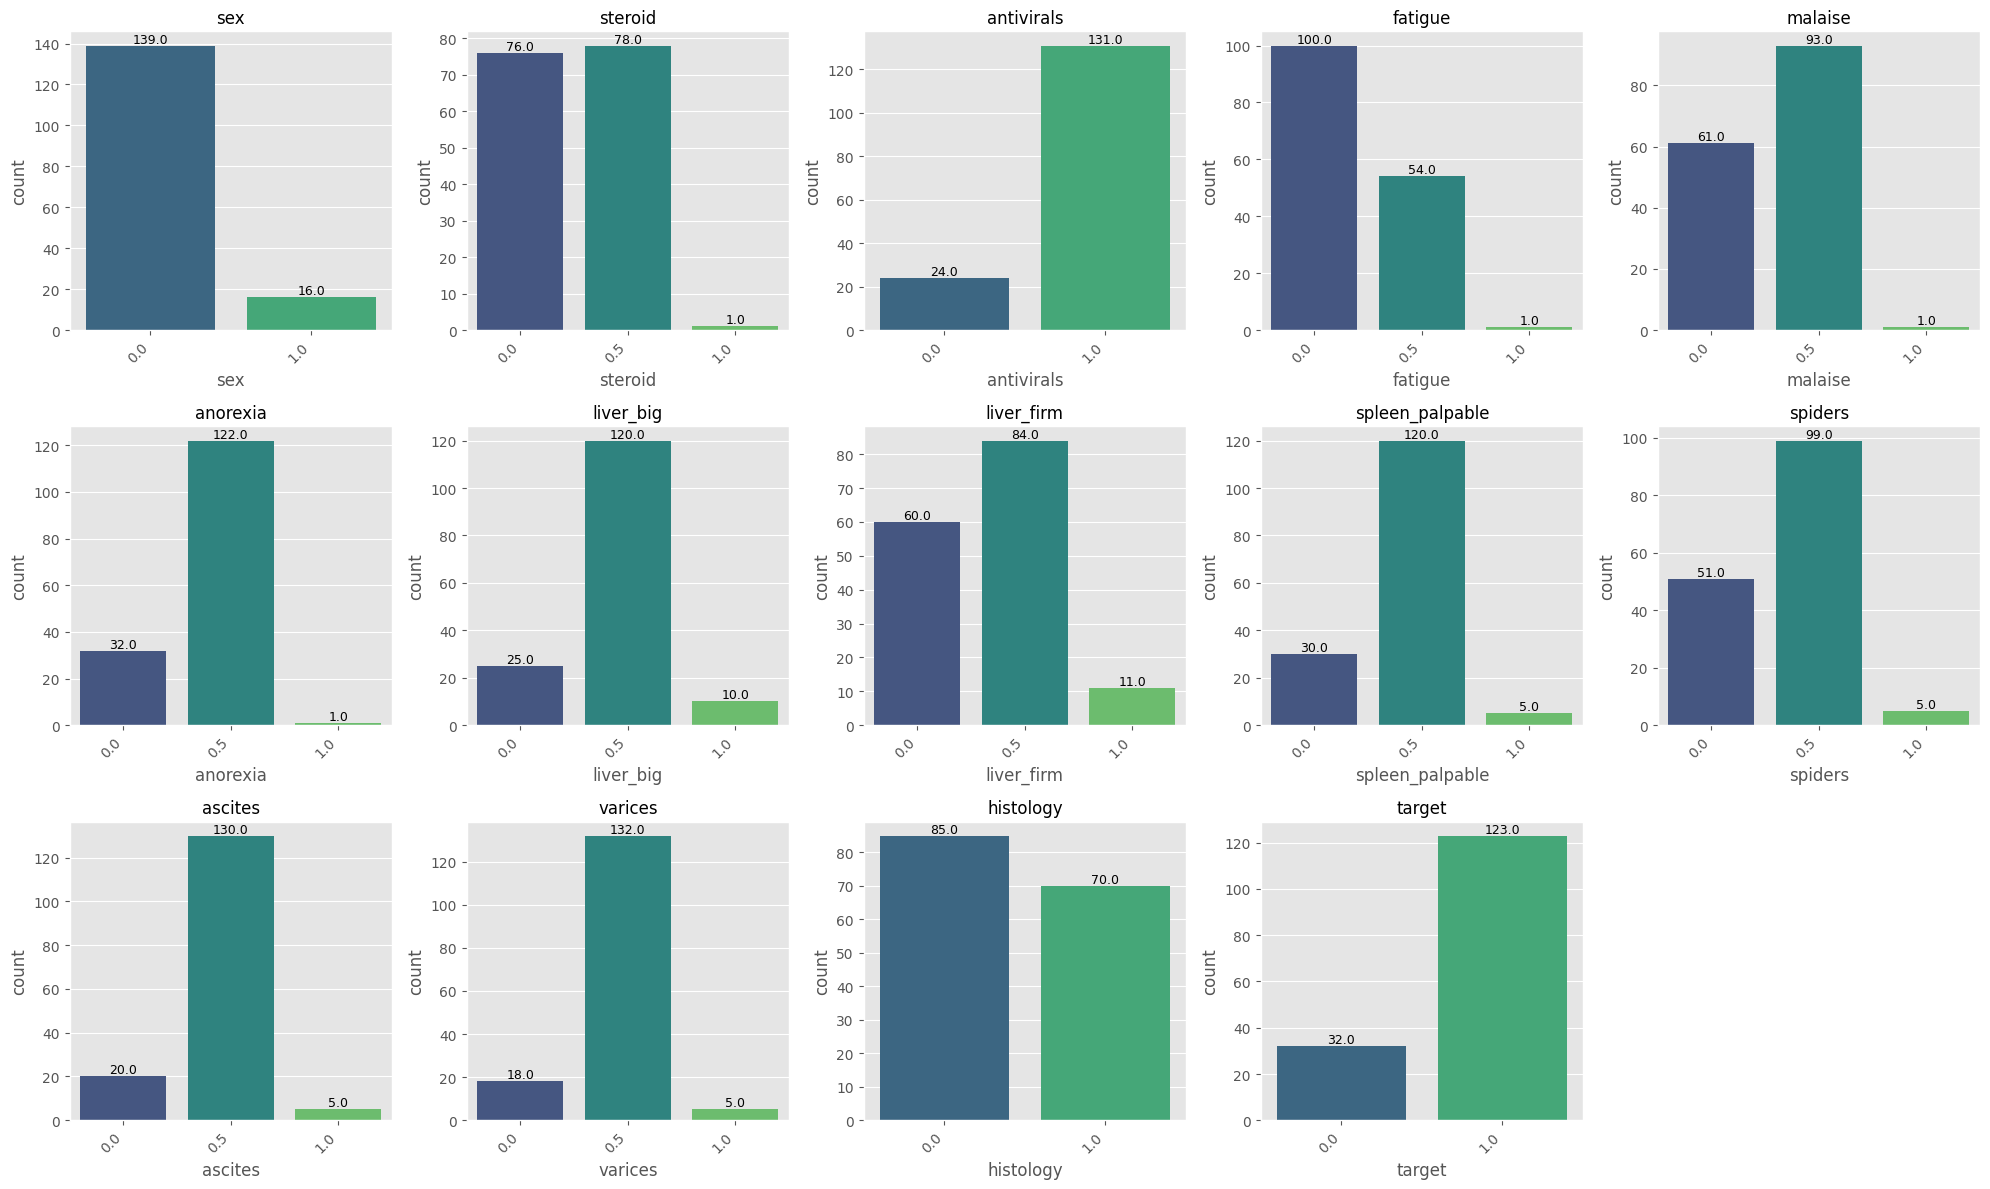

/var/folders/y0/5p1rc9fs535fy8254hdj1qn80000gp/T/ipykernel_32154/3121525240.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="viridis")



7. Key Observations
------------------------------
Target distribution: {1.0: 123, 0.0: 32}

Age statistics by target:
            mean    median       min       max
target                                        
0.0     0.557658  0.556338  0.323944  0.887324
1.0     0.461926  0.436620  0.000000  1.000000

Lab values by target:
       bilirubin           alk_phosphate                sgot            \
            mean    median          mean    median      mean    median   
target                                                                   
0.0     0.529412  0.500000      0.588855  0.728916  0.566592  0.607143   
1.0     0.262076  0.205882      0.668038  0.795181  0.552555  0.571429   

         albumin             protime            
            mean    median      mean    median  
target                                          
0.0     0.395474  0.310345  0.619318  0.727273  
1.0     0.584525  0.551724  0.718958  0.886364  

Features sorted by correlation strength with target:

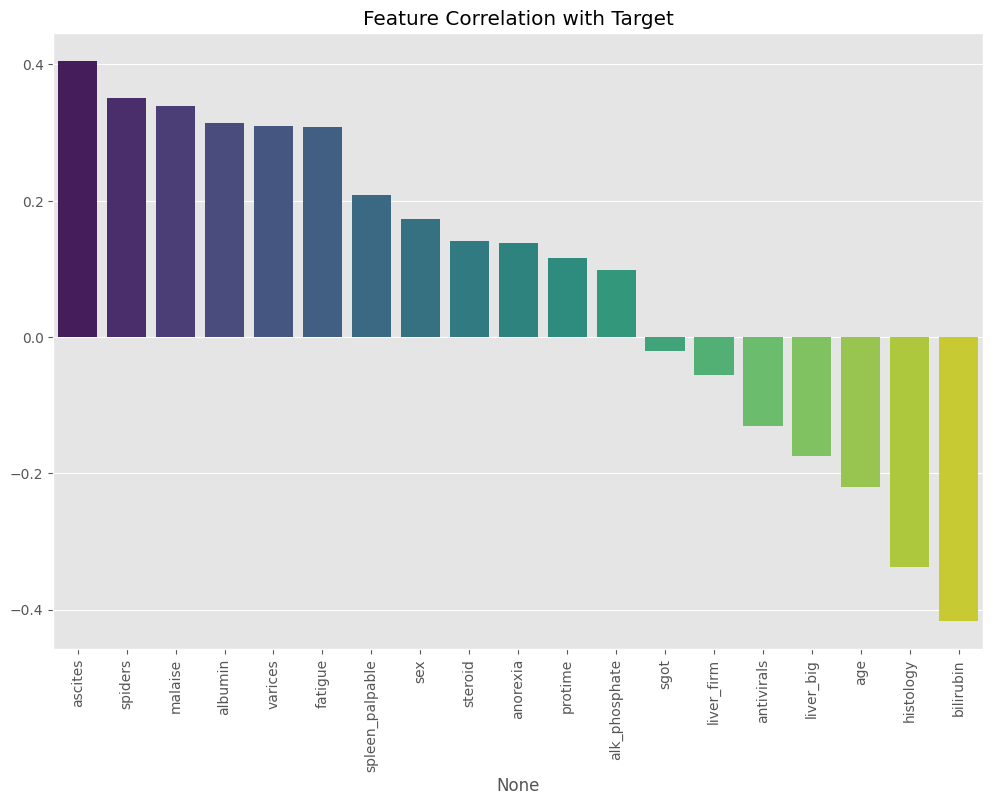

<Figure size 1200x1000 with 0 Axes>

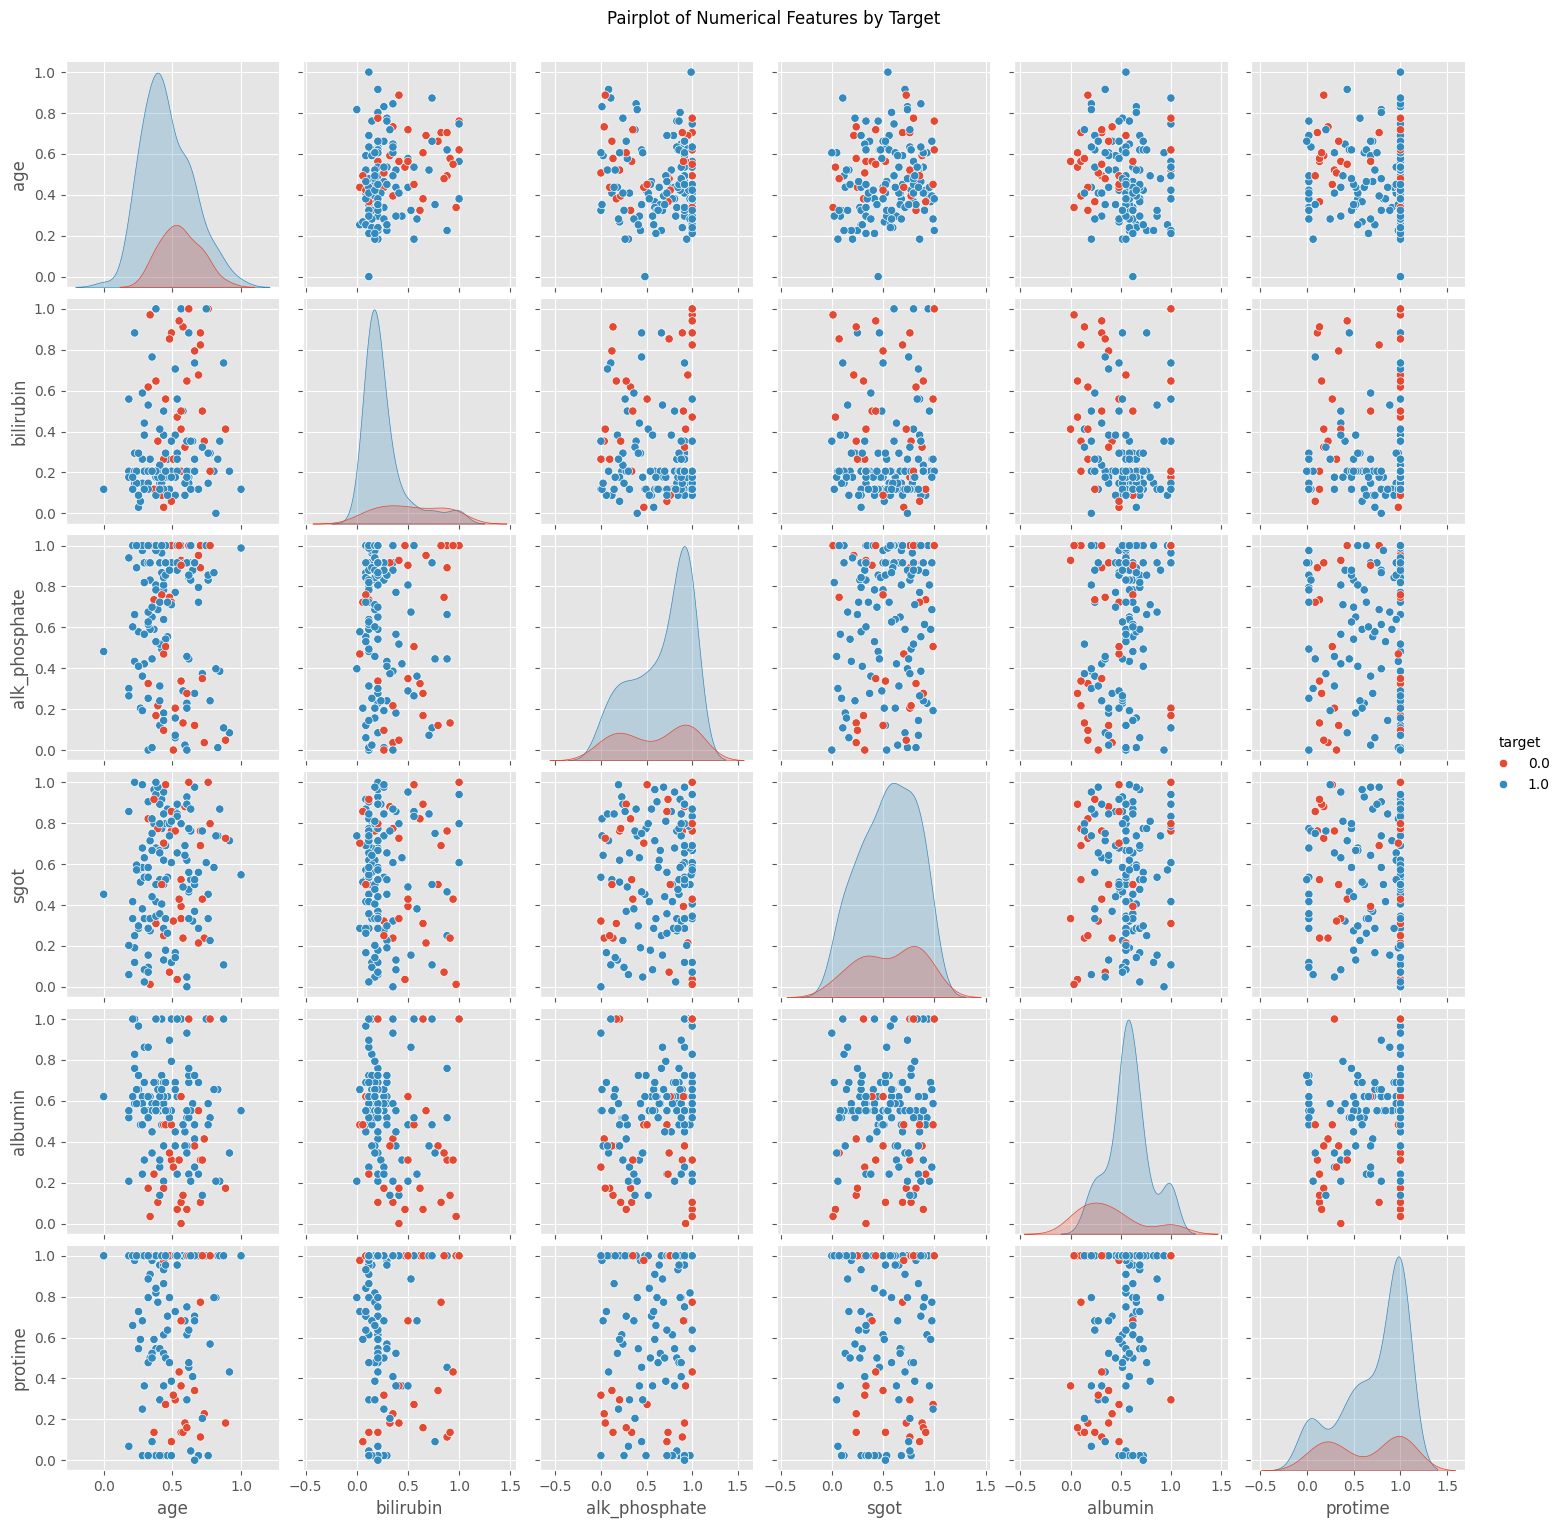

In [1]:
# Import tsv file
import pandas as pd
import os

# Read the TSV file
df = pd.read_csv('hepatitis.tsv', sep='\t')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print(df.head())

import matplotlib.pyplot as plt
import seaborn as sns

# Find outliers
def find_outliers(df):
    # Calculate the Z-score for each column
    z_scores = (df - df.mean()) / df.std()
    # Identify outliers (Z-score > 3 or < -3)
    outliers = (z_scores > 3) | (z_scores < -3)
    return outliers

# Find outliers in the dataset
outliers = find_outliers(df)

# Print outliers
print("Outliers in the dataset:")
for col in outliers.columns:
    if outliers[col].any():
        print(f"Column '{col}':")
        print(df[outliers[col]])
        print()

# Print original shape
print("Original shape:", df.shape)

# Drop outliers - THIS IS THE FIX
df_clean = df[~(outliers.any(axis=1))]

# Print new shape
print("After removing outliers:", df_clean.shape)

# See if there are any missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# See if there are any duplicates
print("Duplicate rows in the dataset:")
print(df.duplicated().sum())

# Print summary statistics
print("Summary statistics of the dataset:")
print(df.describe())

# Print min and max of each column
print("Min and max of each column:")
print(df.min())
print(df.max())
    
# Normalize the data column-wise
def normalize(df):
    df = (df - df.min()) / (df.max() - df.min())
    return df

# Normalize the data
df = normalize(df)

# Print the first 5 rows of the normalized data
print(df.head())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import io

print("1. Basic Dataset Information")
print("-" * 30)
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\n2. Column Names and Data Types")
print("-" * 30)
print(df.dtypes)

print("\n3. Summary Statistics")
print("-" * 30)
print(df.describe())

print("\n4. Missing Values")
print("-" * 30)
print(df.isnull().sum())

# Checking for unique values in each column
print("\n5. Unique Values per Column")
print("-" * 30)
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

# Understanding categorical variables
print("\n6. Categorical Variables Distribution")
print("-" * 30)
categorical_cols = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 
                    'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 
                    'VARICES', 'HISTOLOGY', 'target']
# to lower case
categorical_cols = [col.lower() for col in categorical_cols]

for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())

# Set up plotting
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# Target variable distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='target', data=df, palette="viridis")
plt.title('Target Distribution')
plt.savefig('target_distribution.png')

# Plot all distributions on the same figure
import math
n = len(categorical_cols)
cols = 5  # Columns per row
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 4, rows * 4))  # Dynamic sizing
# Plot
for idx, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, idx + 1)
    ax = sns.countplot(x=col, data=df, palette="viridis")
    plt.title(col, fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Annotate counts
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature correlation with target
plt.figure(figsize=(12, 8))
corr_with_target = df.corr()['target'].sort_values(ascending=False)
# remove target from the correlation
corr_with_target = corr_with_target.drop('target')
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="viridis")
plt.title('Feature Correlation with Target')
plt.xticks(rotation=90)
plt.savefig('feature_correlation.png')

# Analyze numerical features by target
numerical_cols = ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
# Convert to lower case
numerical_cols = [col.lower() for col in numerical_cols]

# Pairplot for key numerical variables
plt.figure(figsize=(12, 10))
sns.pairplot(df[numerical_cols + ['target']], hue='target')
plt.suptitle('Pairplot of Numerical Features by Target', y=1.02)
plt.savefig('pairplot.png')

print("\n7. Key Observations")
print("-" * 30)

# Target distribution
target_counts = df['target'].value_counts()
print(f"Target distribution: {target_counts.to_dict()}")

# Age statistics by target
age_by_target = df.groupby('target')['age'].agg(['mean', 'median', 'min', 'max'])
print("\nAge statistics by target:")
print(age_by_target)

# Key lab values by target
lab_cols = ['BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
# Convert to lower case
lab_cols = [col.lower() for col in lab_cols]
lab_by_target = df.groupby('target')[lab_cols].agg(['mean', 'median'])
print("\nLab values by target:")
print(lab_by_target)

# Feature importance based on correlation with target
important_features = corr_with_target.abs().sort_values(ascending=False)
print("\nFeatures sorted by correlation strength with target:")
print(important_features)